In [1]:
import tensorflow as tf
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

Get Data fro classification problem

Binary Classification

In [2]:
from sklearn.datasets import make_circles

n_samples = 3000
X,y = make_circles(n_samples,noise=0.03,random_state = 42)

In [3]:
circles = pd.DataFrame({
    'X0':X[:,0],
    'X1':X[:,1],
    'Lables': y
})

In [4]:
circles

,X0,X1,Lables
0,0.204614,0.744496,1
1,0.240364,-0.972271,0
2,0.231681,0.765188,1
3,0.485038,0.867620,0
4,-0.397572,-0.703067,1
...,...,...,...
2995,0.691894,0.483294,1
2996,-0.112814,-1.007035,0
2997,-0.004573,-1.009240,0
2998,0.686653,-0.770001,0


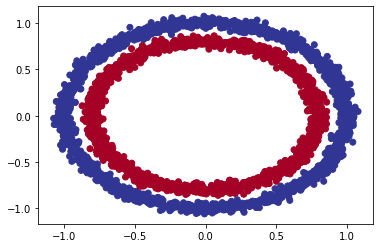

In [5]:
plt.scatter(X[:,0],X[:,1], c = y, cmap=plt.cm.RdYlBu_r)

In [7]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model1.compile(loss=tf.keras.losses.binary_crossentropy,
               optimizer = tf.keras.optimizers.SGD(),
               metrics = ['accuracy'])

model1.fit(X,y,epochs = 10)


Epoch 1/10
94/94 [==============================] - 1s 2ms/step - loss: 2.2898 - accuracy: 0.4960
Epoch 2/10
94/94 [==============================] - 0s 3ms/step - loss: 0.6988 - accuracy: 0.4960
Epoch 3/10
94/94 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.4950
Epoch 4/10
94/94 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.4917
Epoch 5/10
94/94 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4723
Epoch 6/10
94/94 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.4950
Epoch 7/10
94/94 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4950
Epoch 8/10
94/94 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.5020
Epoch 9/10
94/94 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4743
Epoch 10/10
94/94 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4843


Adding an extra layer to the model

In [8]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model2.compile(loss=tf.keras.losses.binary_crossentropy,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['accuracy'])

model2.fit(X, y, epochs=200, verbose = 0)

model2.evaluate(X,y)


94/94 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6932181119918823, 0.5]

Adding more hidden neurons and an extra layer

In [24]:
tf.random.set_seed(42)

model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(None, 1)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(), # Changing the optimizer
               metrics=['accuracy'])

model3.fit(X, y, epochs=100, verbose=0)

model3.evaluate(X, y)


313/313 [==============================] - 1s 1ms/step
Binary Classification


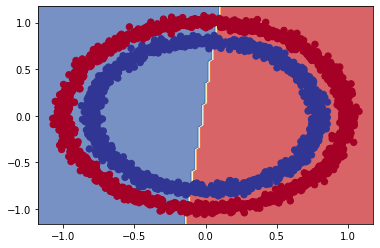

In [11]:
from helper import plot_decision_boundary

plot_decision_boundary(model3,X = X,y = y)

Use the model for a regression problem

In [26]:
# Build a dataset for regression
# tf.random.set_seed(42)

X_reg = tf.range(0,1000,5)
y_reg = tf.range(100,1100,5) # y = X +100

#Split data to train test split
X_reg_train = X_reg[:150]
X_reg_test = X_reg[150:]
y_reg_train = y_reg[:150]
y_reg_test = y_reg[150:] 

model3.fit(tf.expand_dims(X_reg_train, axis = -1),y_reg_train, epochs = 100, verbose =0)


Replicate the model for regression problem

In [33]:
tf.random.set_seed(42)

model4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(None, 1)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model4.compile(loss=tf.keras.losses.mae, # Altering the loss function
               optimizer=tf.keras.optimizers.Adam(), 
               metrics=['mae'])

hist = model4.fit(tf.expand_dims(X_reg_train, axis = -1), y_reg_train, epochs=100,validation_split=0.33, verbose=0)

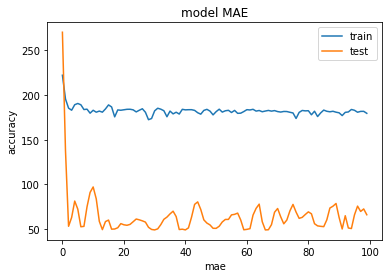

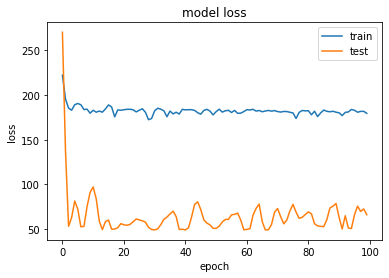

In [34]:
def plot_model_training(history):
    plt.plot(history.history['mae'])
    plt.plot(history.history['val_mae'])
    plt.title('model MAE')
    plt.ylabel('accuracy')
    plt.xlabel('mae')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()

plot_model_training(hist)
